In [23]:
import tensorflow as tf
import pandas as pd
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [24]:
# train_df = pd.read_csv('../content/mnist_train.csv')
# test_df = pd.read_csv('../content/mnist_test.csv')
# x_train = train_df.drop(['label'],axis=1).values
# y_train = train_df['label'].values
# x_test =test_df.drop(['label'],axis=1).values
# y_test = test_df['label'].values
# x_train

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

8


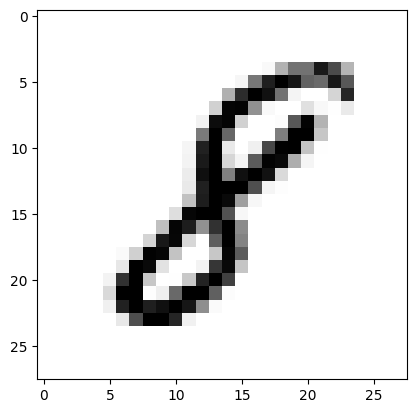

In [25]:
import matplotlib.pyplot as plt
index= 7777
print(y_train[index])
plt.imshow(x_train[index],cmap='Greys')

### Reshaping and Normalizing the Images

In [26]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [31]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [33]:
history  = model.fit(x=x_train,y=y_train,batch_size=512,epochs=11)

Epoch 1/11


118/118 [==============================] - 3s 23ms/step - loss: 0.4449 - accuracy: 0.8767
Epoch 2/11
118/118 [==============================] - 3s 24ms/step - loss: 0.1718 - accuracy: 0.9508
Epoch 3/11
118/118 [==============================] - 3s 23ms/step - loss: 0.1154 - accuracy: 0.9663
Epoch 4/11
118/118 [==============================] - 3s 24ms/step - loss: 0.0879 - accuracy: 0.9740
Epoch 5/11
118/118 [==============================] - 3s 24ms/step - loss: 0.0677 - accuracy: 0.9805
Epoch 6/11
118/118 [==============================] - 3s 24ms/step - loss: 0.0567 - accuracy: 0.9830
Epoch 7/11
118/118 [==============================] - 3s 24ms/step - loss: 0.0466 - accuracy: 0.9859
Epoch 8/11
118/118 [==============================] - 3s 24ms/step - loss: 0.0385 - accuracy: 0.9885
Epoch 9/11
118/118 [==============================] - 3s 25ms/step - loss: 0.0350 - accuracy: 0.9895
Epoch 10/11
118/118 [==============================] - 3s 25ms/step - loss: 0.0298 - accu

In [35]:
loss,acc = model.evaluate(x_test,y_test)
print('loss: ',loss)
print('acc: ',acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9860
loss:  0.04374831169843674
acc:  0.9860000014305115


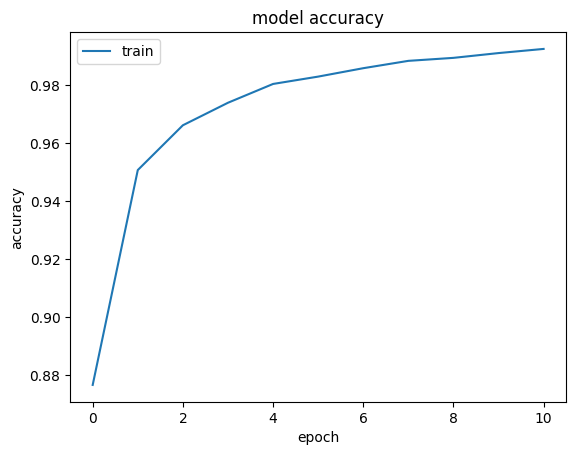

In [36]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

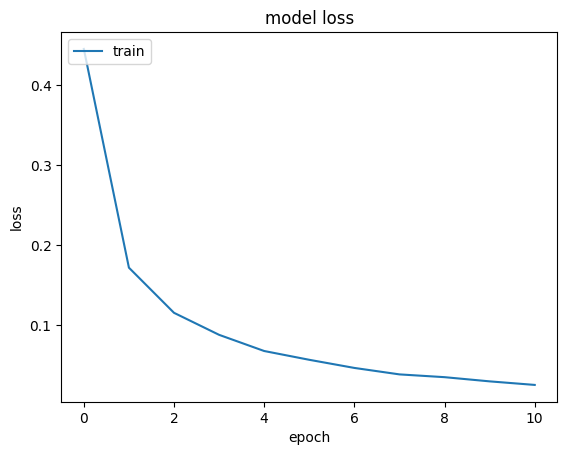

In [37]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 23ms/step
6


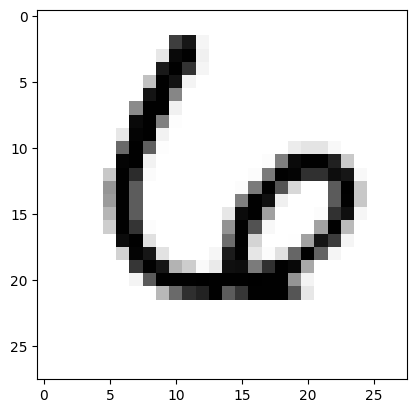

In [39]:
image_index = 4464
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())